In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [345]:
df = pd.read_csv('../datasets/reduced_special_rice.csv')
df.MONTH = df.MONTH.astype(int)
df["DATE"] = pd.to_datetime(df.YEAR.astype(str) + '/' + df.MONTH.astype(str) + '/01')
df = df.set_index('DATE').asfreq('MS')

In [346]:
# Select columns for price prediction and inflation rate
df = df[['Price / kg', 'Inflation Rate (%)']]

In [347]:
df

Price / kg  Inflation Rate (%)
DATE                                      
1990-01-01        9.00            5.071392
1990-02-01        9.00            5.071392
1990-03-01        9.65            5.071392
1990-04-01        9.70            5.071392
1990-05-01        9.70            5.071392
...                ...                 ...
2020-08-01       51.95            2.200000
2020-09-01       51.68            2.200000
2020-10-01       51.13            2.300000
2020-11-01       49.07            3.000000
2020-12-01       49.89            3.300000

[372 rows x 2 columns]

In [348]:
df.shape

(372, 2)

<Axes: xlabel='DATE'>

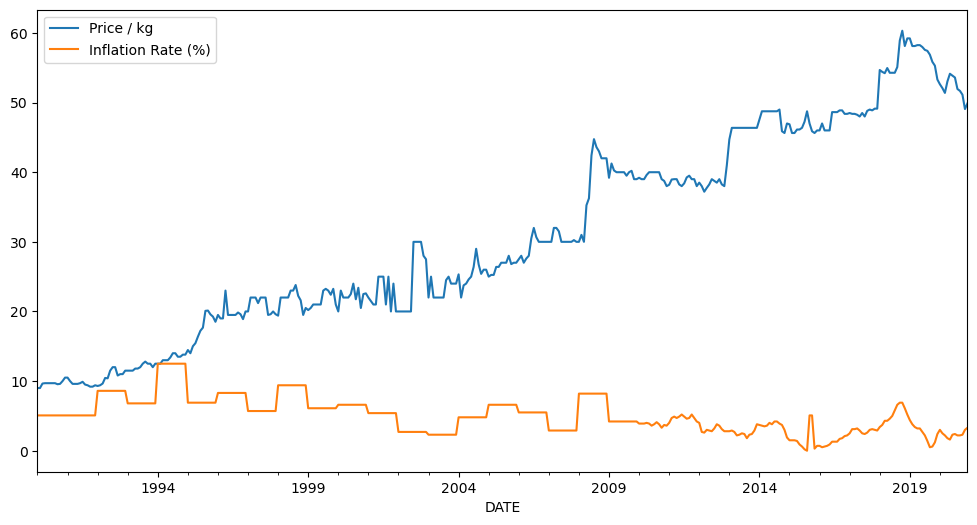

In [349]:
df.plot(figsize=(12,6))

In [350]:
from statsmodels.tsa.seasonal import seasonal_decompose

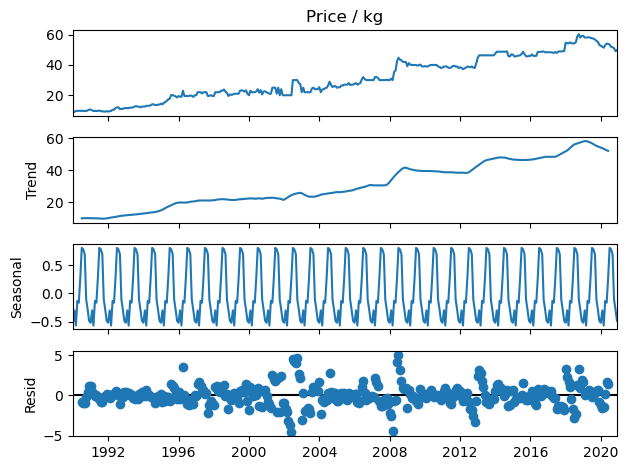

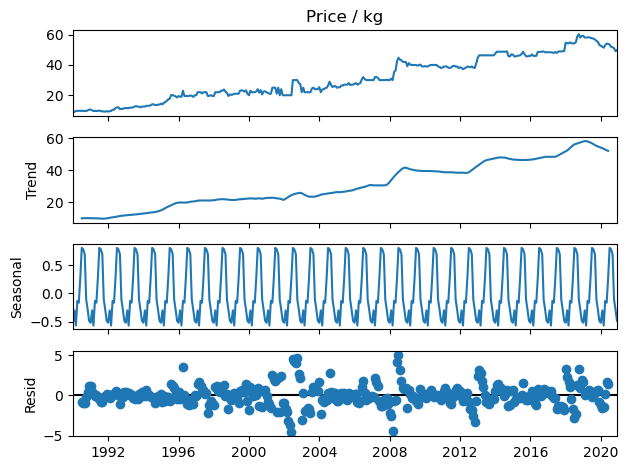

In [351]:
# Perform seasonal decomposition
results = seasonal_decompose(df['Price / kg'])
results.plot()

In [352]:
len(df)

372

In [353]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [354]:
print(f"Train Shape: {train.shape} and Test Shape: {test.shape}")

Train Shape: (360, 2) and Test Shape: (12, 2)


In [355]:
test

Price / kg  Inflation Rate (%)
DATE                                      
2020-01-01       52.63                 3.0
2020-02-01       52.08                 2.5
2020-03-01       51.39                 2.2
2020-04-01       53.04                 1.8
2020-05-01       54.14                 1.6
2020-06-01       53.87                 2.3
2020-07-01       53.60                 2.4
2020-08-01       51.95                 2.2
2020-09-01       51.68                 2.2
2020-10-01       51.13                 2.3
2020-11-01       49.07                 3.0
2020-12-01       49.89                 3.3

In [356]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [357]:
df.head(),df.tail()

(            Price / kg  Inflation Rate (%)
 DATE                                      
 1990-01-01        9.00            5.071392
 1990-02-01        9.00            5.071392
 1990-03-01        9.65            5.071392
 1990-04-01        9.70            5.071392
 1990-05-01        9.70            5.071392,
             Price / kg  Inflation Rate (%)
 DATE                                      
 2020-08-01       51.95                 2.2
 2020-09-01       51.68                 2.2
 2020-10-01       51.13                 2.3
 2020-11-01       49.07                 3.0
 2020-12-01       49.89                 3.3)

In [358]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [359]:
scaled_train.shape

(360, 2)

In [360]:
original_value = scaler.inverse_transform(scaled_train)
original_value

array([[ 9.        ,  5.07139175],
       [ 9.        ,  5.07139175],
       [ 9.65      ,  5.07139175],
       [ 9.7       ,  5.07139175],
       [ 9.7       ,  5.07139175],
       [ 9.7       ,  5.07139175],
       [ 9.7       ,  5.07139175],
       [ 9.7       ,  5.07139175],
       [ 9.55      ,  5.07139175],
       [ 9.6       ,  5.07139175],
       [10.        ,  5.07139175],
       [10.5       ,  5.07139175],
       [10.5       ,  5.07139175],
       [10.        ,  5.07139175],
       [ 9.6       ,  5.07139175],
       [ 9.6       ,  5.07139175],
       [ 9.6       ,  5.07139175],
       [ 9.7       ,  5.07139175],
       [ 9.9       ,  5.07139175],
       [ 9.5       ,  5.07139175],
       [ 9.4       ,  5.07139175],
       [ 9.2       ,  5.07139175],
       [ 9.2       ,  5.07139175],
       [ 9.4       ,  5.07139175],
       [ 9.3       ,  8.6       ],
       [ 9.4       ,  8.6       ],
       [ 9.65      ,  8.6       ],
       [10.45      ,  8.6       ],
       [10.4       ,

In [361]:
scaled_train[:80]

array([[0.        , 0.40571134],
       [0.        , 0.40571134],
       [0.01266563, 0.40571134],
       [0.01363991, 0.40571134],
       [0.01363991, 0.40571134],
       [0.01363991, 0.40571134],
       [0.01363991, 0.40571134],
       [0.01363991, 0.40571134],
       [0.01071707, 0.40571134],
       [0.01169135, 0.40571134],
       [0.01948558, 0.40571134],
       [0.02922837, 0.40571134],
       [0.02922837, 0.40571134],
       [0.01948558, 0.40571134],
       [0.01169135, 0.40571134],
       [0.01169135, 0.40571134],
       [0.01169135, 0.40571134],
       [0.01363991, 0.40571134],
       [0.01753702, 0.40571134],
       [0.00974279, 0.40571134],
       [0.00779423, 0.40571134],
       [0.00389712, 0.40571134],
       [0.00389712, 0.40571134],
       [0.00779423, 0.40571134],
       [0.00584567, 0.688     ],
       [0.00779423, 0.688     ],
       [0.01266563, 0.688     ],
       [0.02825409, 0.688     ],
       [0.02727981, 0.688     ],
       [0.04871395, 0.688     ],
       [0.

In [362]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [363]:
# Define generator for LSTM
n_input = 345
n_features = 2  # Two features: Price / kg and Inflation Rate
generator = TimeseriesGenerator(scaled_train, scaled_train[:, 0], length=n_input, batch_size=1)

In [364]:
# Get the first batch
X, y = generator[0]

# Reshape X to 2D for inverse transformation
# X shape is (1, n_input, n_features)
X_reshaped = X.reshape(n_input, n_features)  # Reshape directly into (n_input, n_features)

# Inverse transform to get original values
original_values = scaler.inverse_transform(X_reshaped)

# Print results
print(f'Given the Array (scaled): \n{X.flatten()}')
print(f'Original values: \n{original_values}')

Given the Array (scaled): 
[0.         0.40571134 0.         0.40571134 0.01266563 0.40571134
 0.01363991 0.40571134 0.01363991 0.40571134 0.01363991 0.40571134
 0.01363991 0.40571134 0.01363991 0.40571134 0.01071707 0.40571134
 0.01169135 0.40571134 0.01948558 0.40571134 0.02922837 0.40571134
 0.02922837 0.40571134 0.01948558 0.40571134 0.01169135 0.40571134
 0.01169135 0.40571134 0.01169135 0.40571134 0.01363991 0.40571134
 0.01753702 0.40571134 0.00974279 0.40571134 0.00779423 0.40571134
 0.00389712 0.40571134 0.00389712 0.40571134 0.00779423 0.40571134
 0.00584567 0.688      0.00779423 0.688      0.01266563 0.688
 0.02825409 0.688      0.02727981 0.688      0.04871395 0.688
 0.05845674 0.688      0.05845674 0.688      0.03507405 0.688
 0.03897116 0.688      0.03897116 0.688      0.04871395 0.688
 0.04871395 0.544      0.04871395 0.544      0.04871395 0.544
 0.05455963 0.544      0.05455963 0.544      0.05845674 0.544
 0.06819953 0.544      0.07404521 0.544      0.06819953 0.544
 0.

In [365]:
# For y, which is a single column (target feature)
y_reshaped = y.reshape(-1, 1)  # This will make it (batch_size, 1)

# Add dummy column to match the scaler's expected shape
y_with_dummy_feature = np.hstack([y_reshaped, np.zeros_like(y_reshaped)])

# Inverse transform and extract the first column (Price / kg)
original_values_y = scaler.inverse_transform(y_with_dummy_feature)[:, 0]

# Print results for y
print(f'Predict this y (scaled): \n {y.flatten()} \n')
print(f'Original values (unscaled y): \n{original_values_y}')

Predict this y (scaled): 
 [1.] 

Original values (unscaled y): 
[60.32]


In [366]:
X.shape

(1, 345, 2)

In [367]:
# We do the same thing, but now instead for 12 months
#n_input = 12
#generator = TimeseriesGenerator(scaled_train[:, 1:2], scaled_train[:, 1:2], length=n_input, batch_size=1)

In [368]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [369]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\Fzkn4\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [370]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100)                 │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,301 (161.33 KB)

 Trainable params: 41,301 (161.33 KB)

 Non-trainable params: 0 (0.00 B)

In [371]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
 4/15 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8672

C:\Users\Fzkn4\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.6952
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0230
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0013
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7.0001e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0018
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0022
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0013
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0011
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7.4772e-04
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 9.3274e-04
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0012
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0012
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 6.0126e-04
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.0192e-04
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7.

In [372]:
import joblib
from tensorflow.keras.models import save_model

# After fitting the model
# Save the LSTM model
model.save('lstm_special_rice_price_model.h5')  # Save the model to an .h5 file

# Save the scaler
joblib.dump(scaler, 'special_scaler.pkl')  # Save the scaler to a .pkl file

['special_scaler.pkl']

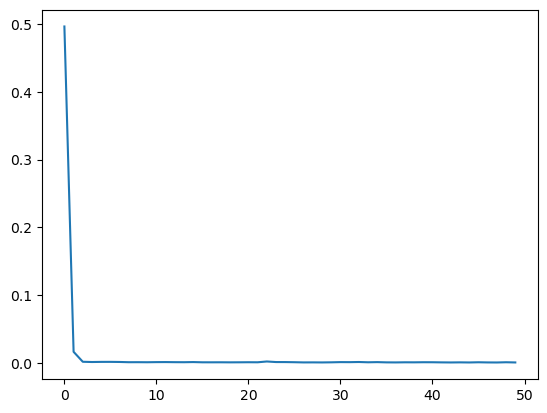

In [373]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [374]:
last_train_batch = scaled_train[-345:]

In [375]:
current_batch = last_train_batch.reshape((1, n_input, n_features))
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [376]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


array([[0.86818504]], dtype=float32)

In [377]:
scaled_test[0]

array([0.85015588, 0.24      ])

In [378]:
# Generate predictions for test set
test_predictions = []
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0].item()  # Convert to scalar
    test_predictions.append(current_pred)
    # Append the prediction and actual inflation rate for the next step
    new_feature = np.array([[current_pred, scaled_test[i, 1]]])  # Shape (1, 2)
    new_feature = np.expand_dims(new_feature, axis=0)  # Shape (1, 1, 2)
    current_batch = np.concatenate((current_batch[:, 1:, :], new_feature), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [379]:
test_predictions

[0.8681850433349609,
 0.8716826438903809,
 0.8686895966529846,
 0.8631621599197388,
 0.8545207977294922,
 0.8451173305511475,
 0.8428396582603455,
 0.8404803276062012,
 0.8359503746032715,
 0.8316816091537476,
 0.8283792734146118,
 0.8311454653739929]

In [380]:
test.head()

Price / kg  Inflation Rate (%)
DATE                                      
2020-01-01       52.63                 3.0
2020-02-01       52.08                 2.5
2020-03-01       51.39                 2.2
2020-04-01       53.04                 1.8
2020-05-01       54.14                 1.6

In [381]:
# Inverse transform predictions to original scale
true_predictions = scaler.inverse_transform(np.c_[test_predictions, scaled_test[:, 1]])[:, 0]

In [382]:
test['Predictions'] = true_predictions

C:\Users\Fzkn4\AppData\Local\Temp\ipykernel_10208\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

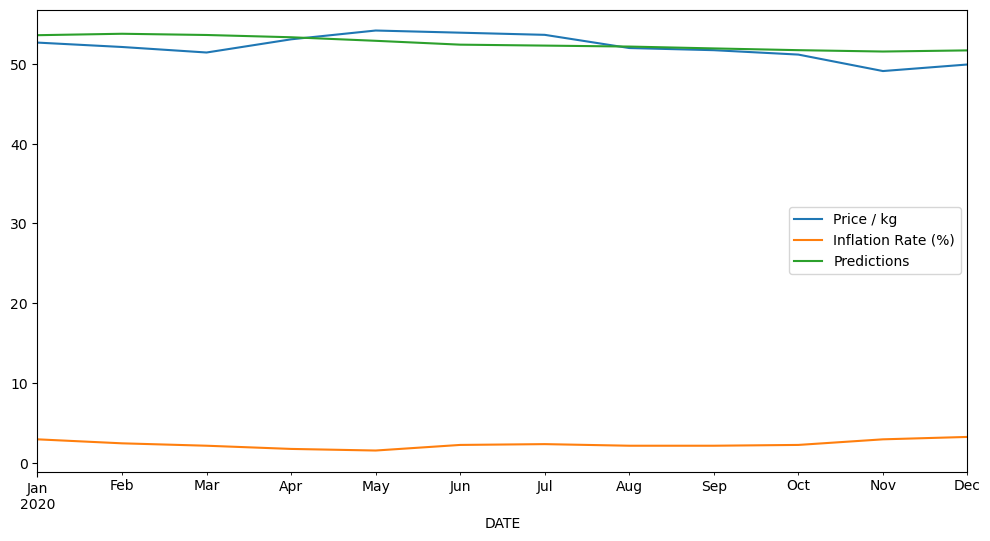

In [383]:
# test["Price / kg"].plot(figsize=(14,5))
test.plot(figsize=(12,6))

In [384]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['Price / kg'], test['Predictions']))
print(f'RMSE: {rmse}')

# Calculate MSE
mse = mean_squared_error(test['Price / kg'], test['Predictions'])
print(f'MSE: {mse}')

# Calculate MAE
mae = mean_absolute_error(test['Price / kg'], test['Predictions'])
print(f'MAE: {mae}')

RMSE: 1.4034811981014963
MSE: 1.9697594734244113
MAE: 1.1934846053520822


In [385]:
# Predict future price for the selected month and year
future_dates = pd.date_range(start='2025-01-01', periods=1, freq='MS')
future_predictions = []
for _ in range(len(future_dates)):
    current_pred = model.predict(current_batch)[0].item()  # Convert to scalar
    future_predictions.append(current_pred)
    # Use predicted price and most recent inflation rate
    new_feature = np.array([[current_pred, scaled_train[-1, 1]]])  # Shape (1, 2)
    new_feature = np.expand_dims(new_feature, axis=0)  # Shape (1, 1, 2)
    current_batch = np.concatenate((current_batch[:, 1:, :], new_feature), axis=1)
# Inverse transform future predictions
actual_future_predictions = scaler.inverse_transform(np.c_[future_predictions, [scaled_train[-1, 1]]])
predicted_price = actual_future_predictions[0][0]
print(f"Predicted Price for {future_dates[0].strftime('%B %Y')}: {predicted_price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Price for January 2025: 51.8542667222023


In [386]:
import pandas as pd
import numpy as np

# Predict prices from 2015 to 2020
start_date = '2015-01-01'
end_date = '2020-12-01'
future_dates = pd.date_range(start=start_date, end=end_date, freq='MS')  # Monthly start
future_predictions = []

# Initialize the batch (assuming current_batch is correctly defined)
current_batch = scaled_train[-n_input:].reshape(1, n_input, n_features)

for _ in range(len(future_dates)):
    # Predict the next price
    current_pred = model.predict(current_batch)[0].item()  # Convert to scalar
    future_predictions.append(current_pred)
    
    # Create new feature using predicted price and most recent inflation rate
    new_feature = np.array([[current_pred, scaled_train[-1, 1]]])  # Shape (1, 2)
    new_feature = np.expand_dims(new_feature, axis=0)  # Shape (1, 1, 2)
    
    # Update the current batch with the new prediction
    current_batch = np.concatenate((current_batch[:, 1:, :], new_feature), axis=1)

# Inverse transform predictions
scaled_future_predictions = np.array(future_predictions).reshape(-1, 1)  # Shape (num_predictions, 1)
dummy_inflation = np.tile(scaled_train[-1, 1], (len(future_predictions), 1))  # Repeat last inflation value
inverse_transformed = scaler.inverse_transform(np.hstack((scaled_future_predictions, dummy_inflation)))

# Extract predicted prices
predicted_prices = inverse_transformed[:, 0]

# Assume original_prices contains actual data from 2015 to 2020 for comparison
original_prices = df.loc['2015-01-01':'2020-12-01', 'Price / kg'].values

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Date': future_dates,
    'Original Price': original_prices,
    'Predicted Price': predicted_prices
}).set_index('Date')

# Display the comparison
print(comparison_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━